In [10]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the iris dataset
iris = load_iris()

# Display the dataset keys
print("Keys of the iris dataset:", iris.keys())

# Example: print the feature names and the first 5 rows of data
print("Feature names:", iris.feature_names)
print("First 5 rows of data:\n", iris.data[:5])


Keys of the iris dataset: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
First 5 rows of data:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


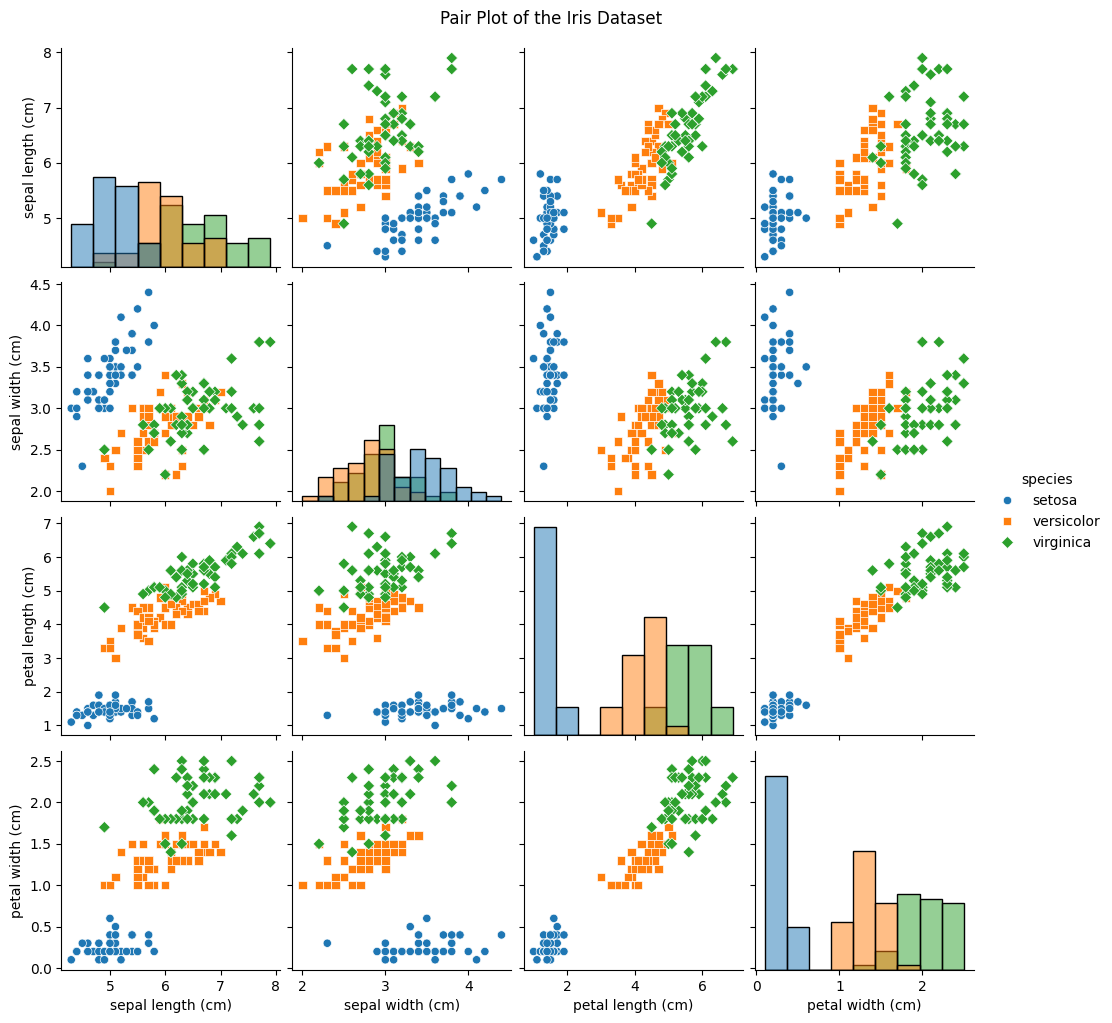

C:\Users\alext\AppData\Local\Temp\ipykernel_16544\798921866.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.hist(by='species', figsize=(12, 8), bins=15, edgecolor='black')


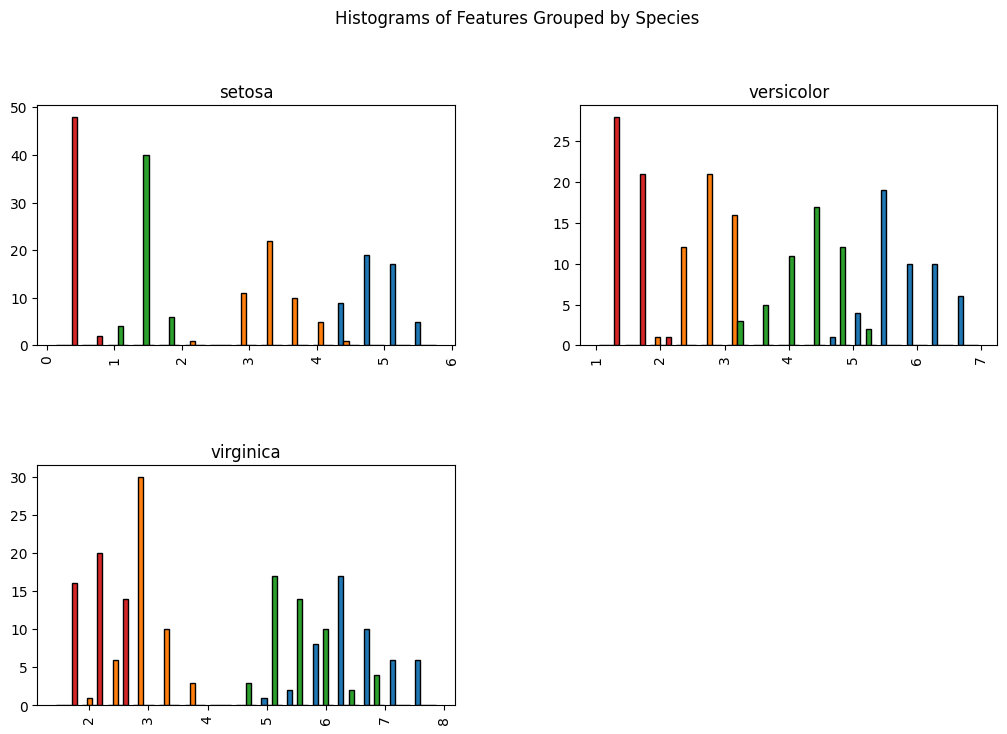

C:\Users\alext\AppData\Local\Temp\ipykernel_16544\798921866.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for species, group in df.groupby('species'):


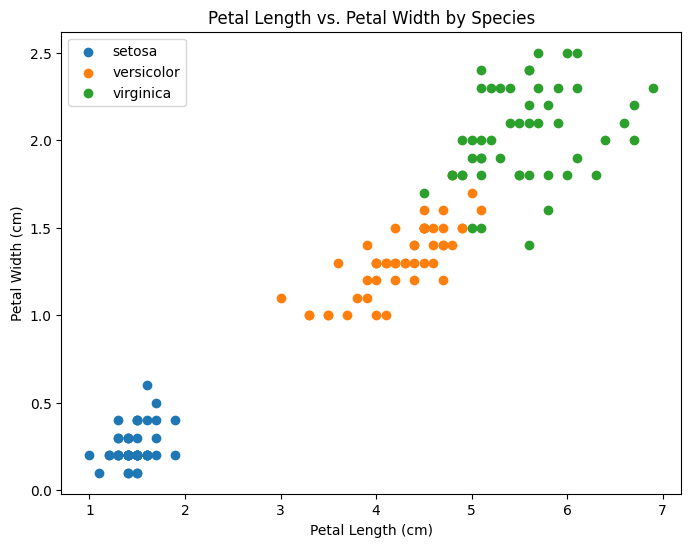

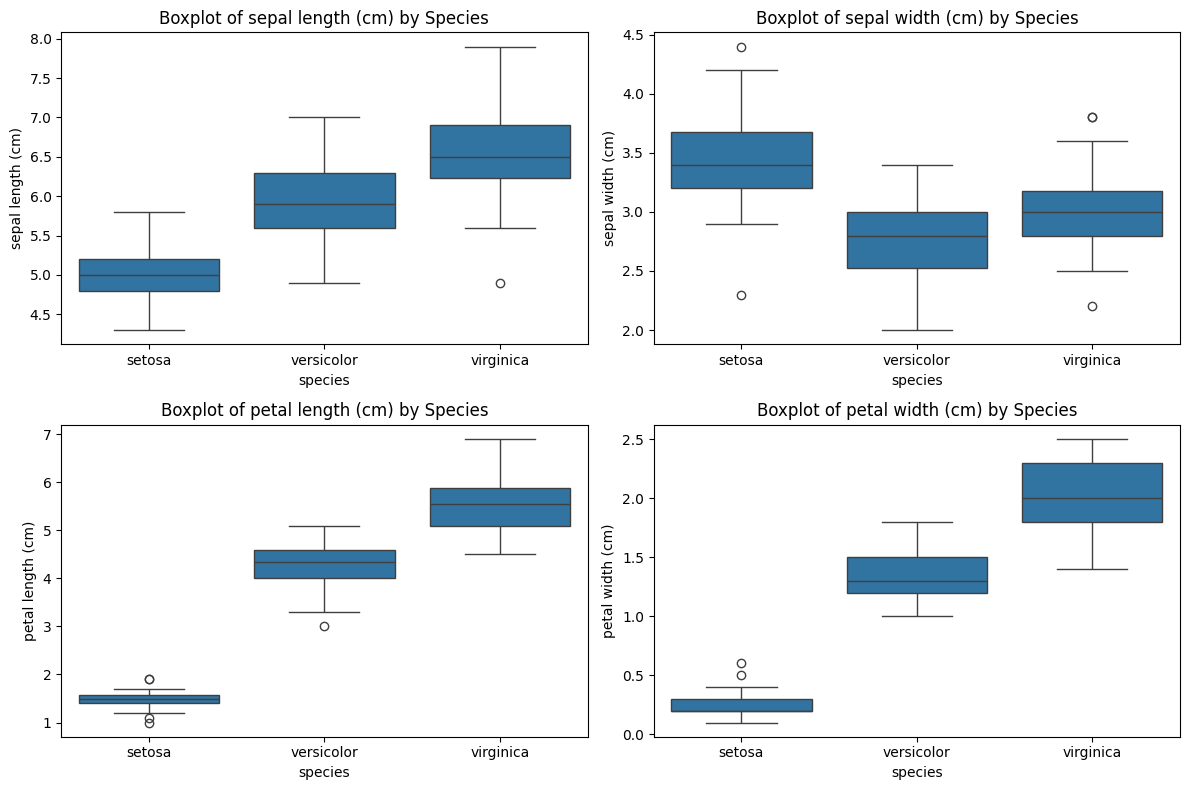

In [11]:
# Create a DataFrame for easier plotting
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# 1. Pair Plot (Scatterplot matrix)
sns.pairplot(df, hue='species', diag_kind='hist', markers=["o", "s", "D"])
plt.suptitle("Pair Plot of the Iris Dataset", y=1.02)
plt.show()

# 2. Histograms for each feature (grouped by species)
df.hist(by='species', figsize=(12, 8), bins=15, edgecolor='black')
plt.suptitle("Histograms of Features Grouped by Species", y=1.02)
plt.show()

# 3. Scatter Plot: Petal Length vs. Petal Width
plt.figure(figsize=(8, 6))
for species, group in df.groupby('species'):
    plt.scatter(group['petal length (cm)'], group['petal width (cm)'], label=species)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Length vs. Petal Width by Species')
plt.legend()
plt.show()

# 4. Box Plots for each feature by species
plt.figure(figsize=(12, 8))
for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='species', y=feature, data=df)
    plt.title(f'Boxplot of {feature} by Species')
plt.tight_layout()
plt.show()


C:\Users\alext\AppData\Local\Temp\ipykernel_16544\2400860716.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for species, group in df.groupby('species'):
C:\Users\alext\AppData\Local\Temp\ipykernel_16544\2400860716.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for species, group in df.groupby('species'):


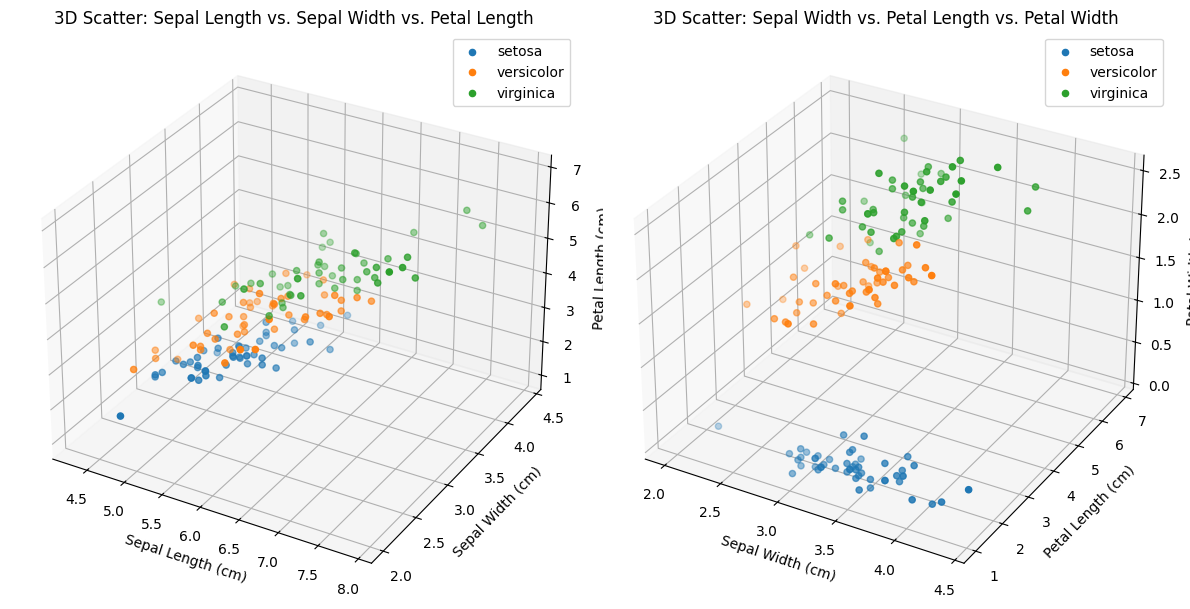

In [12]:
# ---------------------------
# 3D Scatter Plot Example 1
# ---------------------------
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121, projection='3d')

# Plot using Sepal Length, Sepal Width, and Petal Length
for species, group in df.groupby('species'):
    ax1.scatter(group['sepal length (cm)'], group['sepal width (cm)'],
                group['petal length (cm)'], label=species)

ax1.set_xlabel('Sepal Length (cm)')
ax1.set_ylabel('Sepal Width (cm)')
ax1.set_zlabel('Petal Length (cm)')
ax1.set_title('3D Scatter: Sepal Length vs. Sepal Width vs. Petal Length')
ax1.legend()

# ---------------------------
# 3D Scatter Plot Example 2
# ---------------------------
ax2 = fig.add_subplot(122, projection='3d')

# Plot using Sepal Width, Petal Length, and Petal Width
for species, group in df.groupby('species'):
    ax2.scatter(group['sepal width (cm)'], group['petal length (cm)'],
                group['petal width (cm)'], label=species)

ax2.set_xlabel('Sepal Width (cm)')
ax2.set_ylabel('Petal Length (cm)')
ax2.set_zlabel('Petal Width (cm)')
ax2.set_title('3D Scatter: Sepal Width vs. Petal Length vs. Petal Width')
ax2.legend()

plt.tight_layout()
plt.show()

In [13]:
import numpy as np
# Standardize Data
# Why? Each feature might have a different scale (e.g., centimeters vs. kilograms). 
# Standardizing (subtracting the mean and dividing by the standard deviation) 
# puts all features on a comparable scale.

mean = np.mean(iris.data, axis=0)
std_dev = np.std(iris.data, axis=0)
data_standardized = (iris.data - mean) / std_dev


In [14]:
# Calculate the covariance matrix
# Why? The covariance matrix captures how the features vary together

cov_matrix = np.cov(data_standardized, rowvar=False)

In [15]:
# Find Eigenvectors and Eigenvalues
# Why? PCA is all about finding the directions
# (eigenvectors) in which the data has the most variance (eigenvalues)

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)


In [16]:
# Transform data
# Why? Once you have the top n eigenvectors, you can
# project (transform) your data onto these directions, reducing the dimensionality
# from the original number of features down to n

# Sort eigenvalues/eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvectors_sorted = eigenvectors[:, sorted_indices]

# Select the top n eigenvectors
n_components = 2  # for example
top_eigenvectors = eigenvectors_sorted[:, :n_components]

# Project the data
data_pca = np.dot(data_standardized, top_eigenvectors)

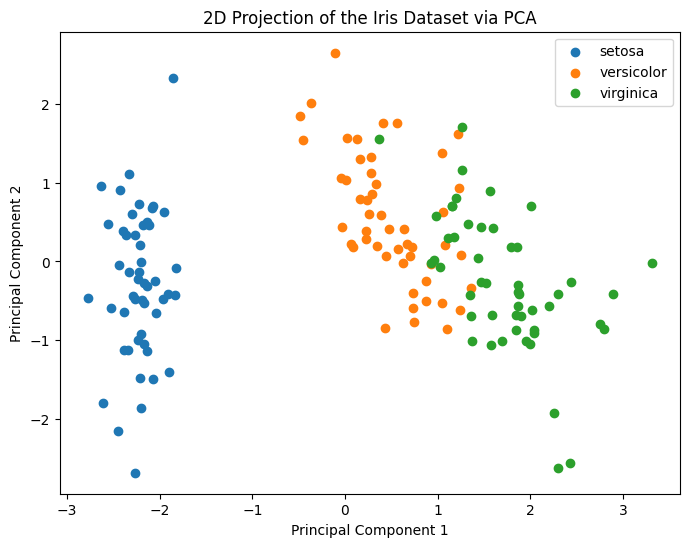

In [18]:
target = iris.target
target_names = iris.target_names

# Now, plot the 2D PCA results
plt.figure(figsize=(8, 6))

# Plot each species in a different color
for label in np.unique(target):
    plt.scatter(data_pca[target == label, 0],
                data_pca[target == label, 1],
                label=target_names[label])

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D Projection of the Iris Dataset via PCA")
plt.legend()
plt.show()